# Test notebook

In [1]:
library(ggplot2)
library(SCPA)
library(dplyr)
library(tibble)
library(msigdbr)
library(Seurat)
library(SeuratData)
library(harmony)
library(SeuratWrappers)
#library(future)

This is version 1.5.3 of SCPA
For SCPA tutorials and latest version: https://jackbibby1.github.io/SCPA/
For the SCPA GitHub page: https://github.com/jackbibby1/SCPA
If you use SCPA, please cite: Bibby JA. et al. Cell Rep. 2022



Attachement du package : ‘dplyr’


Les objets suivants sont masqués depuis ‘package:stats’:

    filter, lag


Les objets suivants sont masqués depuis ‘package:base’:

    intersect, setdiff, setequal, union


The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject

Le chargement a nécessité le package : Rcpp



In [2]:
options(repr.plot.width = 18, repr.plot.height = 17, repr.plot.pointsize = 24)

chargement des données

In [3]:
seRNA_1.data <- Read10X("/home/adufour/work/matrice_rna/filtered_feature_bc_matrix_J7")
seRNA_2.data <- Read10X("/home/adufour/work/matrice_rna/filtered_feature_bc_matrix_J9-1")
seRNA_3.data <- Read10X("/home/adufour/work/matrice_rna/filtered_feature_bc_matrix_J9-2")
seRNA_4.data <- Read10X("/home/adufour/work/matrice_rna/filtered_feature_bc_matrix_J11-1")
seRNA_5.data <- Read10X("/home/adufour/work/matrice_rna/filtered_feature_bc_matrix_J11-2")
seRNA_6.data <- Read10X("/home/adufour/work/matrice_rna/filtered_feature_bc_matrix_J11-3")
seRNA_7.data <- Read10X("/home/adufour/work/matrice_rna/filtered_feature_bc_matrix_J11-4")
seRNA_ES7.data <- Read10X("/home/adufour/work/matrice_rna/filtered_feature_bc_matrix_lw7")
seRNA_ES9.data <- Read10X("/home/adufour/work/matrice_rna/filtered_feature_bc_matrix_lw9")

10X data contains more than one type and is being returned as a list containing matrices of each type.

10X data contains more than one type and is being returned as a list containing matrices of each type.

10X data contains more than one type and is being returned as a list containing matrices of each type.

10X data contains more than one type and is being returned as a list containing matrices of each type.

10X data contains more than one type and is being returned as a list containing matrices of each type.

10X data contains more than one type and is being returned as a list containing matrices of each type.

10X data contains more than one type and is being returned as a list containing matrices of each type.

10X data contains more than one type and is being returned as a list containing matrices of each type.

10X data contains more than one type and is being returned as a list containing matrices of each type.



In [4]:
seRNA_1 <- CreateSeuratObject(counts = seRNA_1.data$`Gene Expression`)
seRNA_2 <- CreateSeuratObject(counts = seRNA_2.data$`Gene Expression`)
seRNA_3 <- CreateSeuratObject(counts = seRNA_3.data$`Gene Expression`)
seRNA_4 <- CreateSeuratObject(counts = seRNA_4.data$`Gene Expression`)
seRNA_5 <- CreateSeuratObject(counts = seRNA_5.data$`Gene Expression`)
seRNA_6 <- CreateSeuratObject(counts = seRNA_6.data$`Gene Expression`)
seRNA_7 <- CreateSeuratObject(counts = seRNA_7.data$`Gene Expression`)
seRNA_ES7 <- CreateSeuratObject(counts = seRNA_ES7.data$`Gene Expression`)
seRNA_ES9 <- CreateSeuratObject(counts = seRNA_ES9.data$`Gene Expression`)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [5]:
seRNA_1$origin <- "EMB"
seRNA_2$origin <- "EMB"
seRNA_3$origin <- "EMB"
seRNA_4$origin <- "EMB"
seRNA_5$origin <- "EMB"
seRNA_6$origin <- "EMB"
seRNA_7$origin <- "EMB"
seRNA_ES7$origin <- "ESC"
seRNA_ES9$origin <- "ESC"

seRNA_1$TIME <- "E7"
seRNA_2$TIME <- "E9"
seRNA_3$TIME <- "E9"
seRNA_4$TIME <- "E11"
seRNA_5$TIME <- "E11"
seRNA_6$TIME <- "E11"
seRNA_7$TIME <- "E11"
seRNA_ES7$TIME <- "E7"
seRNA_ES9$TIME <- "E9"

seRNA_1$SAMP <- "A"
seRNA_2$SAMP <- "Z"
seRNA_3$SAMP <- "E"
seRNA_4$SAMP <- "R"
seRNA_5$SAMP <- "T"
seRNA_6$SAMP <- "Y"
seRNA_7$SAMP <- "U"
seRNA_ES7$SAMP <- "I"
seRNA_ES9$SAMP <- "O"

In [6]:
seurat <- merge(x = seRNA_1, y = list(seRNA_2, seRNA_3, seRNA_4, seRNA_5, seRNA_6, seRNA_7, seRNA_ES7, seRNA_ES9))

Warning message in CheckDuplicateCellNames(object.list = objects):
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”


In [1]:
cell_metadata <- readRDS("/home/adufour/work/rds_storage/omics/stemcell_metadata.rds")

In [8]:
cell_metadata$X <- rownames(cell_metadata)

Le chargement a nécessité le package : S4Vectors

Le chargement a nécessité le package : stats4

Le chargement a nécessité le package : BiocGenerics


Attachement du package : ‘BiocGenerics’


Les objets suivants sont masqués depuis ‘package:dplyr’:

    combine, intersect, setdiff, union


Les objets suivants sont masqués depuis ‘package:stats’:

    IQR, mad, sd, var, xtabs


Les objets suivants sont masqués depuis ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min



Attachement du package : ‘S4Vectors’


Les objets suivants sont masqués depuis ‘package:dplyr’:

    first, rename


L'objet suivant est masqué depuis ‘package:

In [9]:
read_csv <- cell_metadata

In [10]:
read_csv$X <- gsub(".*#","",read_csv$X)

In [11]:
read_csv[read_csv$Sample == "J7","X"] <- paste0(read_csv[read_csv$Sample == "J7","X"], "_1")

In [12]:
read_csv[read_csv$Sample == "J9-1","X"] <- paste0(read_csv[read_csv$Sample == "J9-1","X"], "_2")
read_csv[read_csv$Sample == "J9-2","X"] <- paste0(read_csv[read_csv$Sample == "J9-2","X"], "_3")
read_csv[read_csv$Sample == "J11-1","X"] <- paste0(read_csv[read_csv$Sample == "J11-1","X"], "_4")
read_csv[read_csv$Sample == "J11-2","X"] <- paste0(read_csv[read_csv$Sample == "J11-2","X"], "_5")
read_csv[read_csv$Sample == "J11-3","X"] <- paste0(read_csv[read_csv$Sample == "J11-3","X"], "_6")
read_csv[read_csv$Sample == "J11-4","X"] <- paste0(read_csv[read_csv$Sample == "J11-4","X"], "_7")
read_csv[read_csv$Sample == "lw7","X"] <- paste0(read_csv[read_csv$Sample == "lw7","X"], "_8")
read_csv[read_csv$Sample == "lw9","X"] <- paste0(read_csv[read_csv$Sample == "lw9","X"], "_9")

In [13]:
seurat@meta.data$CellName <- rownames(seurat@meta.data)

In [14]:
seurat_subset <- subset(seurat, subset = CellName %in% read_csv$X)

In [15]:
seurat_subset

An object of class Seurat 
35670 features across 17297 samples within 1 assay 
Active assay: RNA (35670 features, 0 variable features)

In [16]:
seurat_subset@meta.data$Cluster <- read_csv$Clusters

In [17]:
seurat_subset@meta.data$Time <- read_csv$Time

In [18]:
seurat.integrated <- seurat_subset

In [19]:
table(seurat.integrated$Cluster)


   C2    C4    C6 
 3509 12787  1001 

In [31]:
embryo <- NormalizeData(seurat.integrated) %>% FindVariableFeatures() %>% ScaleData() %>% RunPCA(verbose = FALSE)
#embryo <- RunHarmony(embryo, theta = 1, lambda = 0.7, group.by.vars = "SAMP")

Centering and scaling data matrix



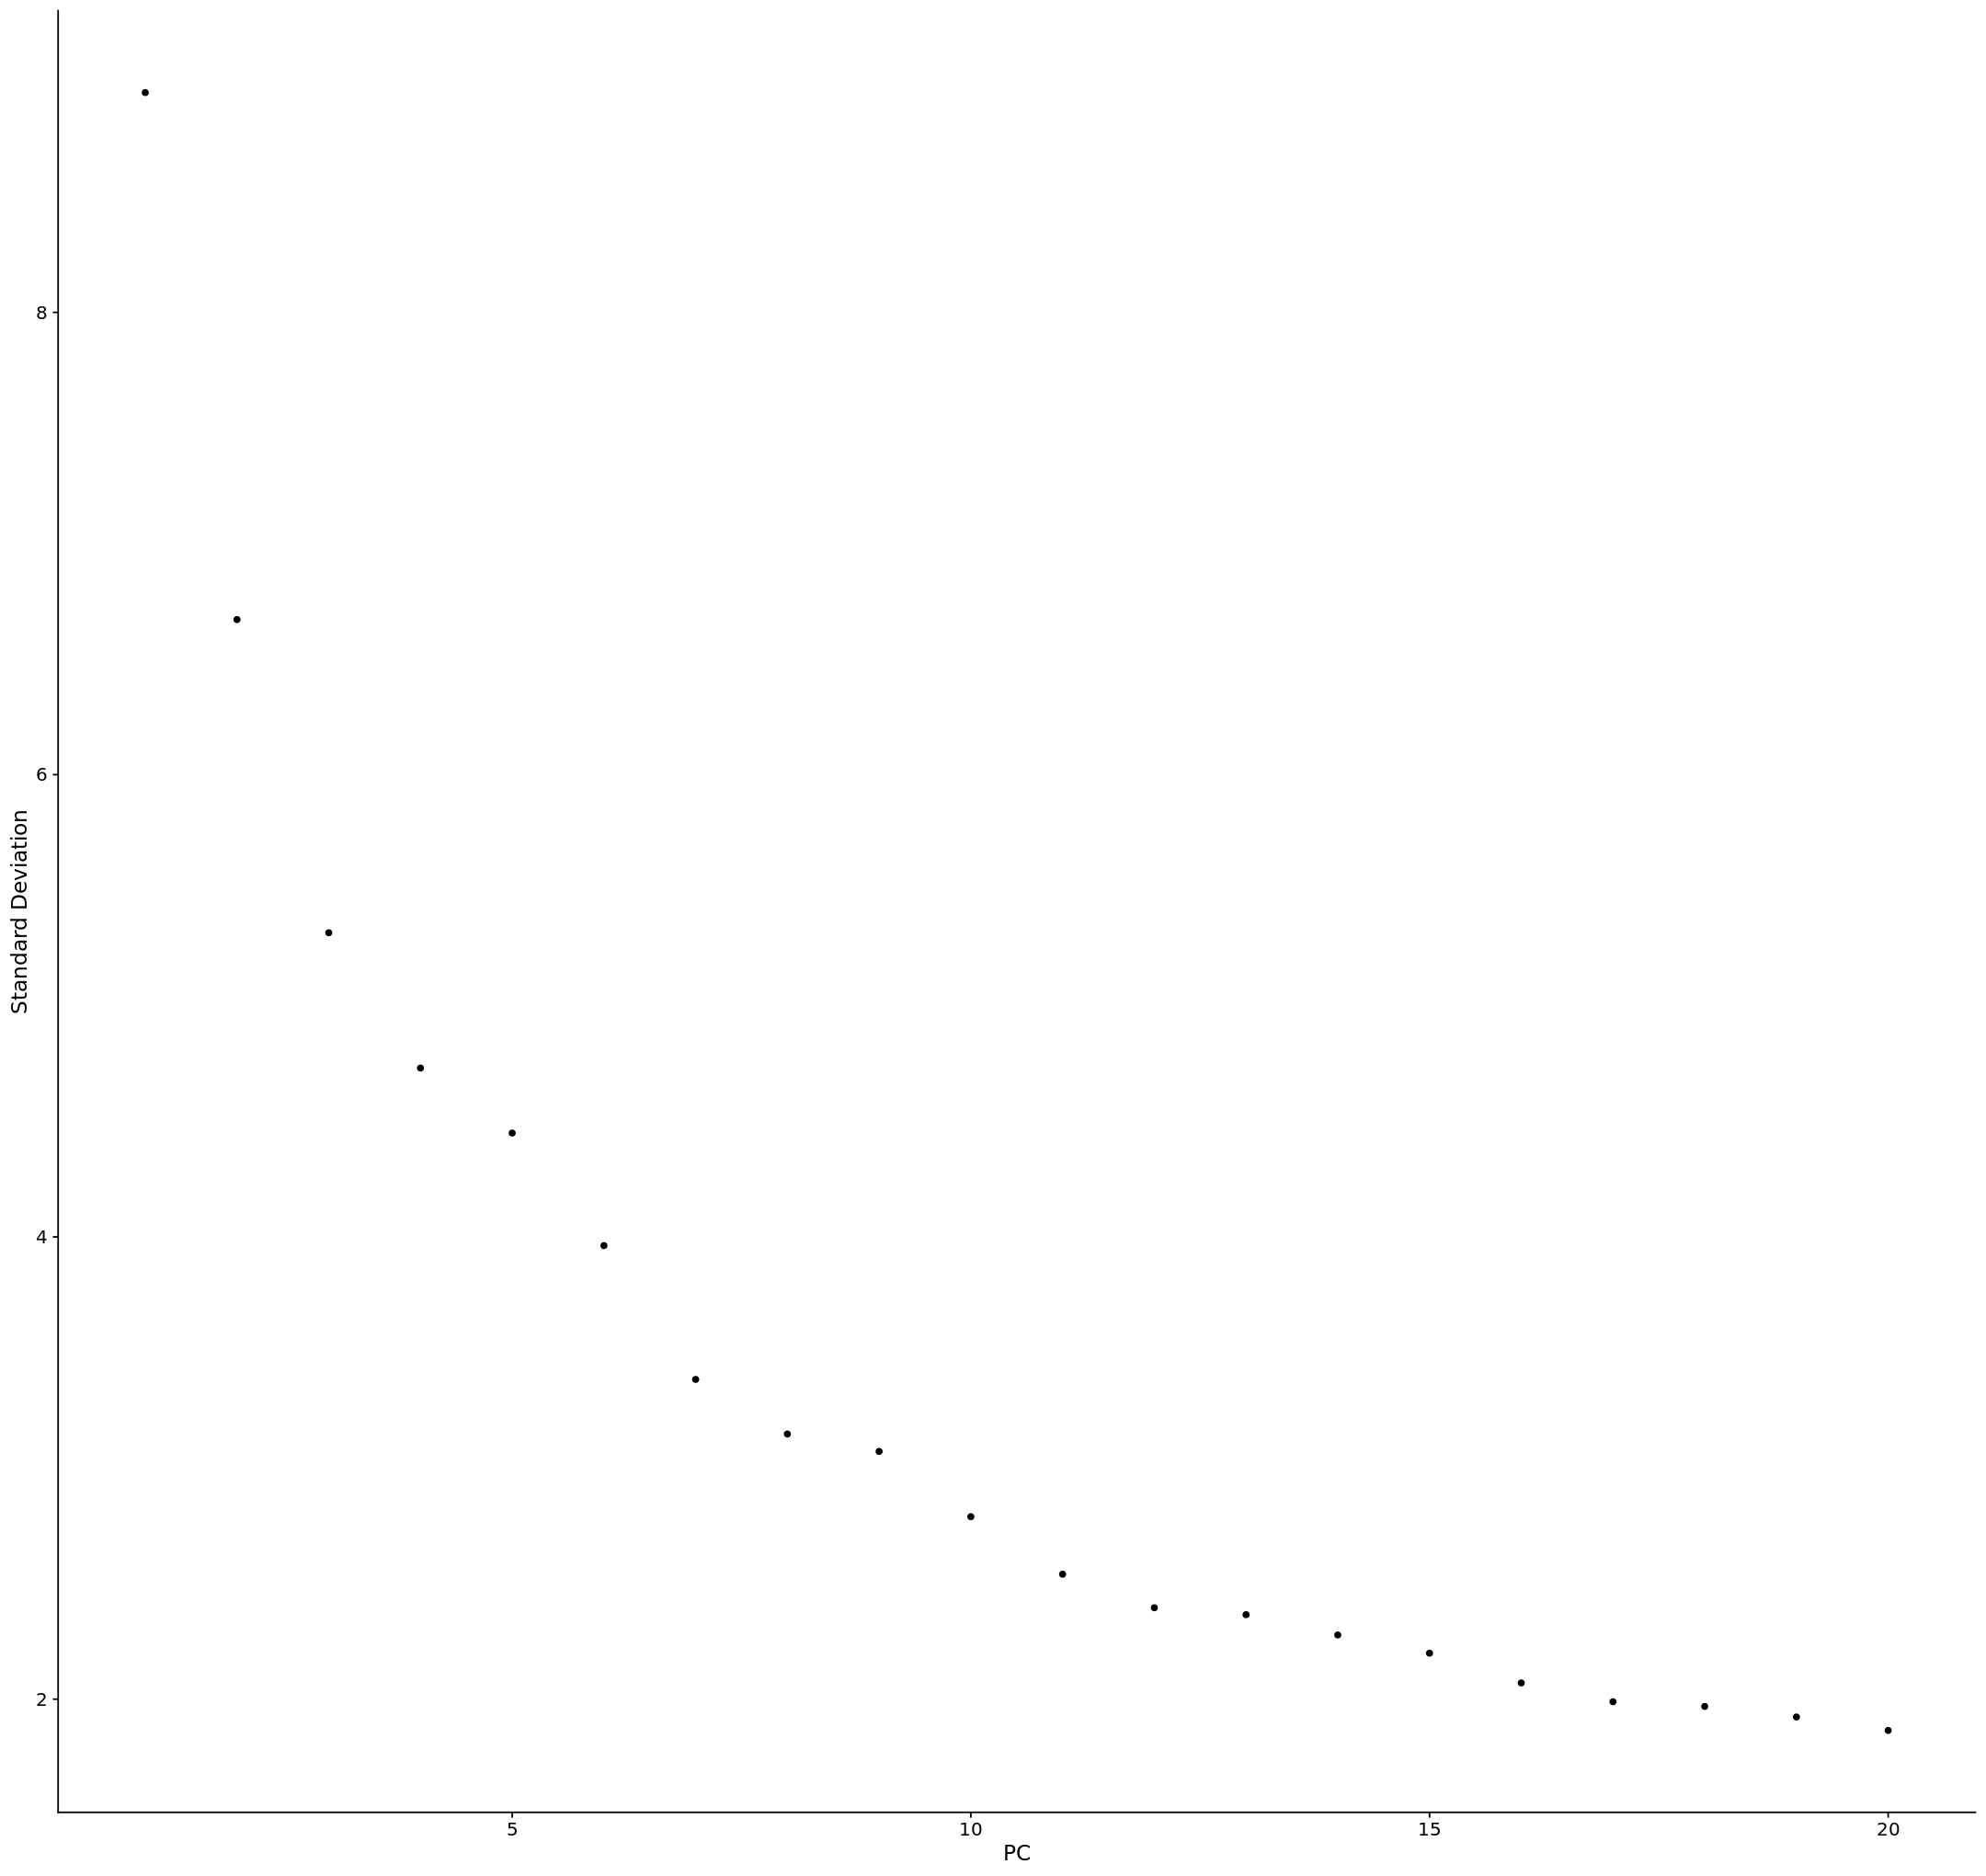

In [32]:
ElbowPlot(embryo)

In [33]:
embryo <- RunUMAP(embryo, dims = 1:15)

12:07:03 UMAP embedding parameters a = 0.9922 b = 1.112

12:07:03 Read 17297 rows and found 15 numeric columns

12:07:03 Using Annoy for neighbor search, n_neighbors = 30

12:07:03 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

12:07:04 Writing NN index file to temp file /tmp/RtmptjLIXu/file3484f32f1e9aae

12:07:04 Searching Annoy index using 1 thread, search_k = 3000

12:07:10 Annoy recall = 100%

12:07:10 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

12:07:12 Initializing from normalized Laplacian + noise (using irlba)

12:07:12 Commencing optimization for 200 epochs, with 710744 positive edges

12:07:20 Optimization finished



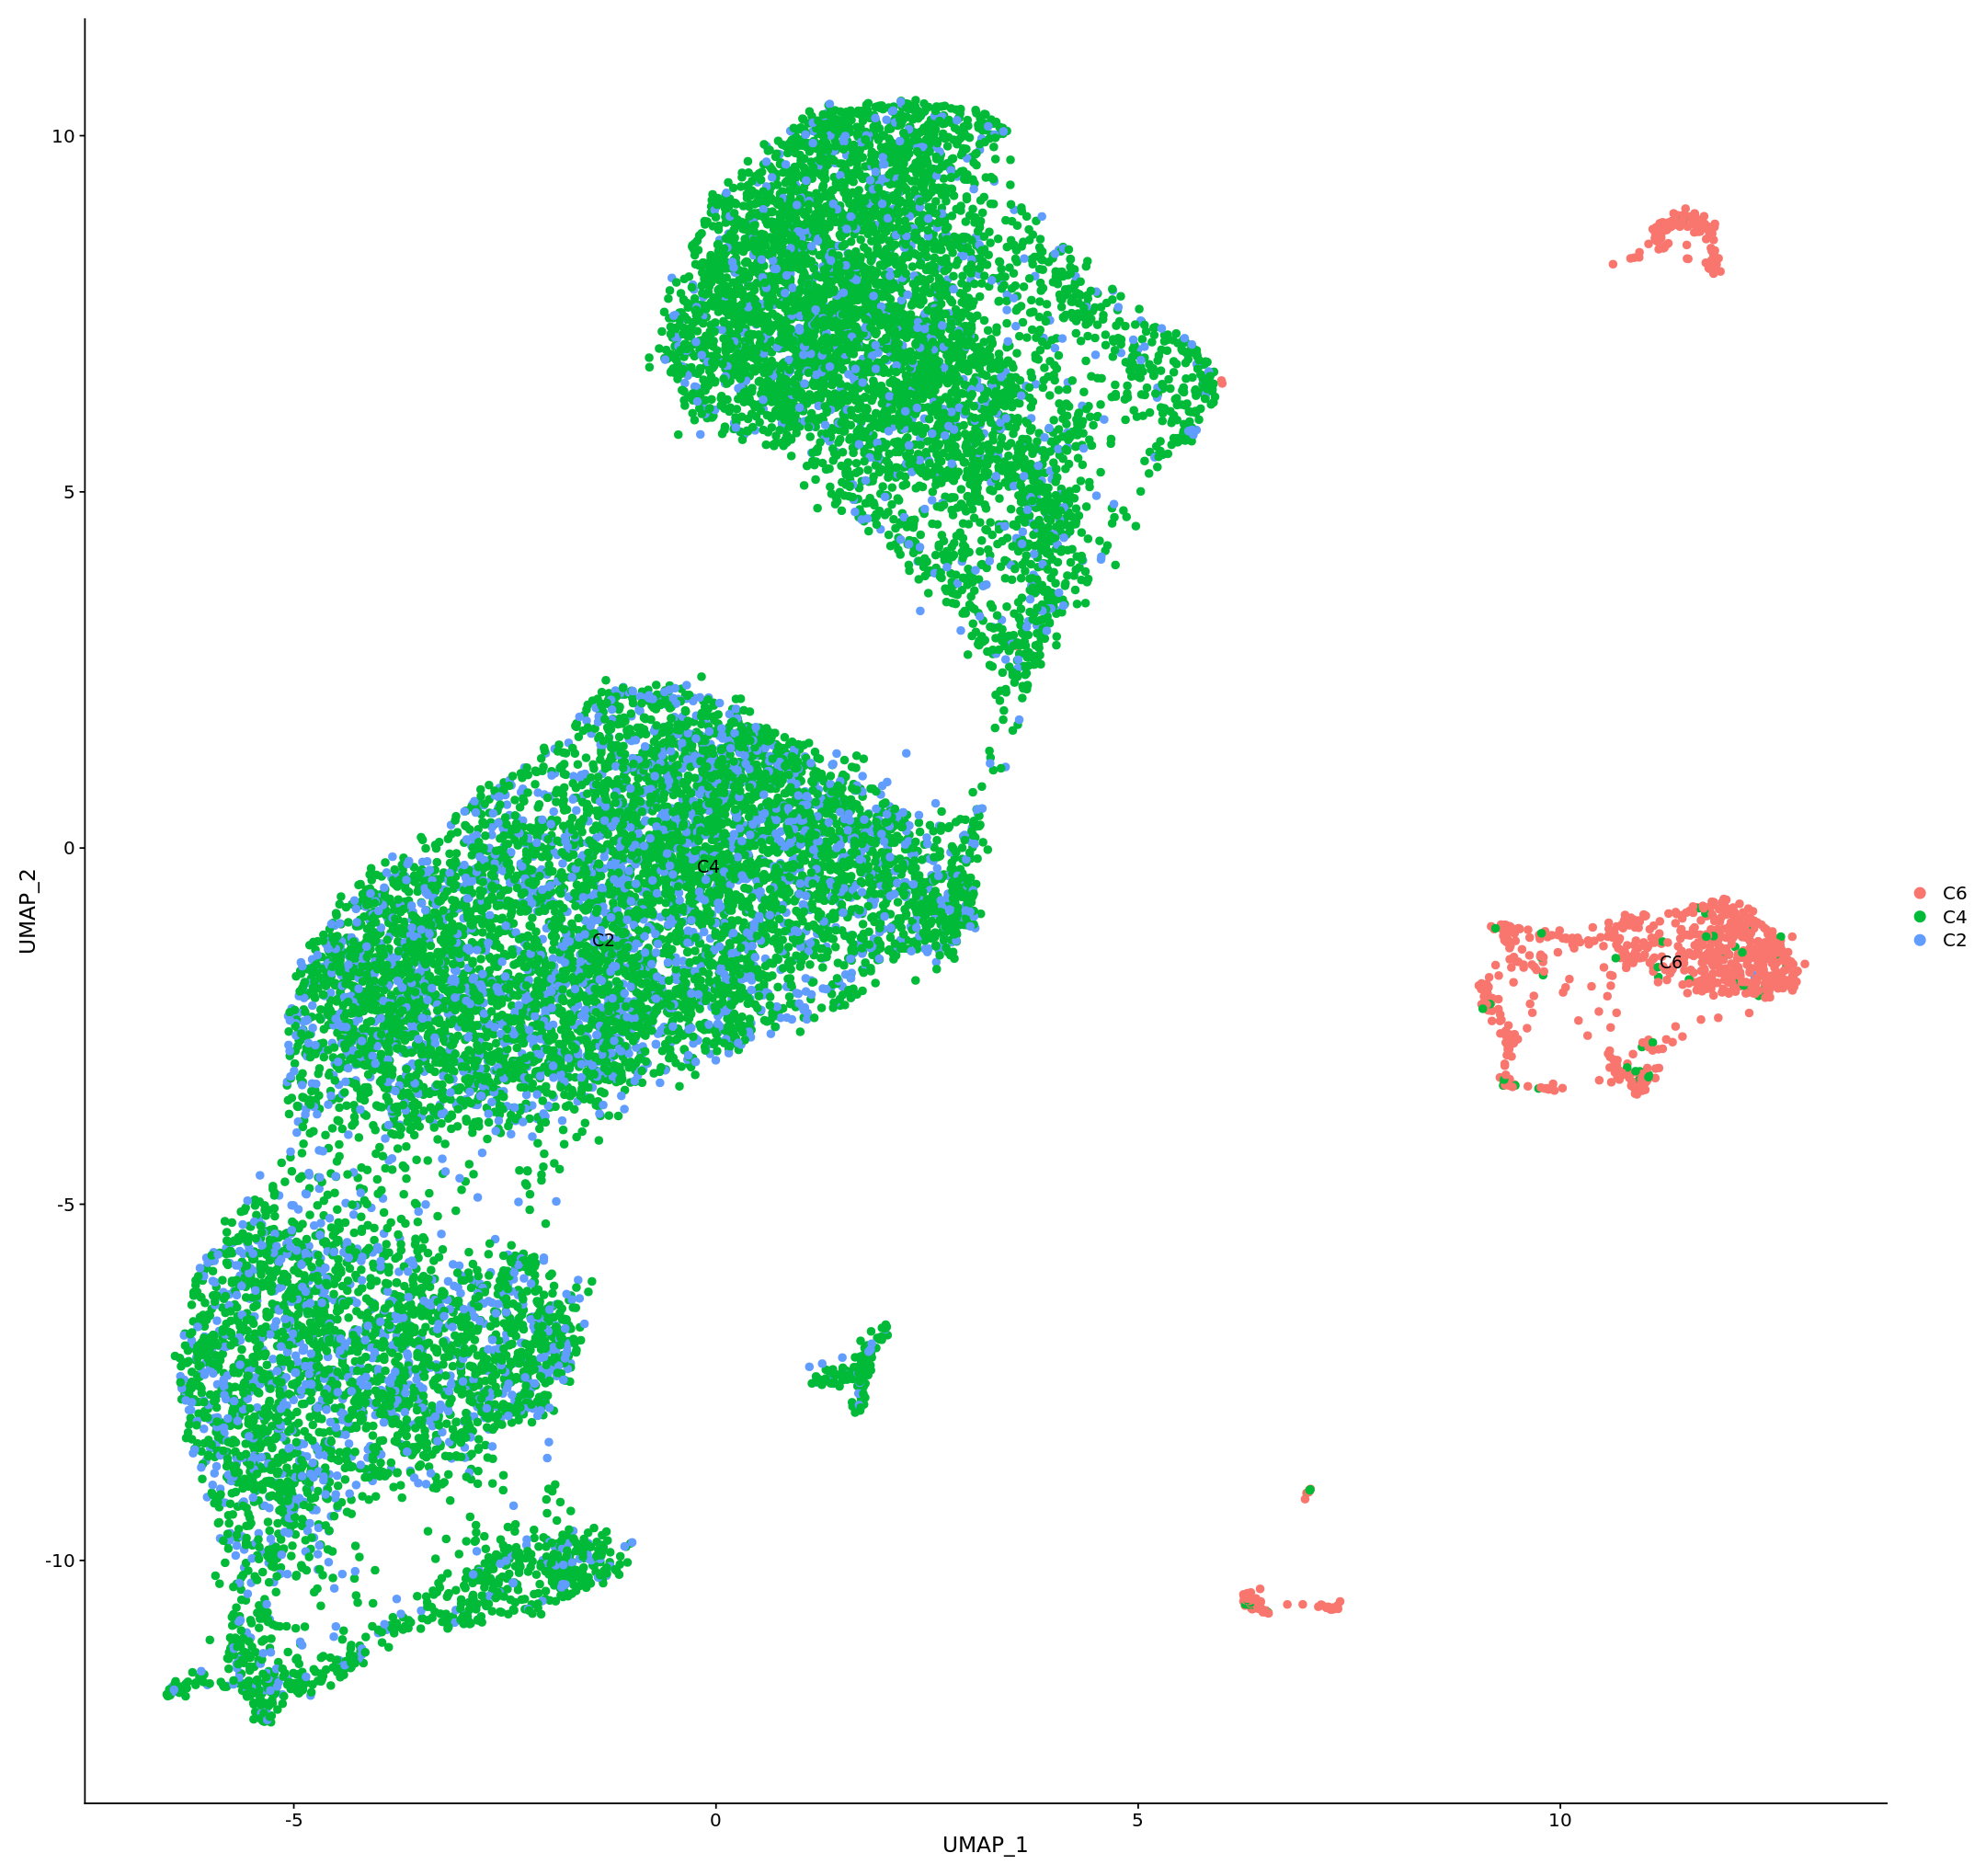

In [34]:
Idents(embryo) <- "Cluster"
DimPlot(embryo, reduction = "umap", pt.size = 2, label = TRUE)

In [35]:
neuro <- seurat_extract(embryo,
                          meta1 = "origin", value_meta1 = "EMB")

meso <- seurat_extract(embryo,
                          meta1 = "origin", value_meta1 = "ESC")

Extracting cells where origin == EMB

Extracting data from the RNA assay

Extracting cells where origin == ESC

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 4.3 GiB”
Extracting data from the RNA assay



In [36]:
tb1 <- msigdbr("Sus scrofa", category = "C2", subcategory = "CP:KEGG")
tb2 <- msigdbr("Sus scrofa", category = "C5", subcategory = "GO:BP")
tb3 <- msigdbr("Sus scrofa", category = "H")

In [37]:
pathways <- rbind(tb1, tb2, tb3) %>%
  format_pathways()

In [38]:
rest_act <- compare_pathways(samples = list(neuro, meso), 
                             pathways = pathways,
                             parallel = TRUE,
                             cores = 5)

Processing in parallel using 5 cores


Cell numbers in population 1 = 1060

Cell numbers in population 2 = 16237

- If greater than 500 cells, these populations will be downsampled


Excluding 3759 pathway(s) based on min/max genes parameter: GOBP_10_FORMYLTETRAHYDROFOLATE_METABOLIC_PROCESS, GOBP_2FE_2S_CLUSTER_ASSEMBLY, GOBP_3_PHOSPHOADENOSINE_5_PHOSPHOSULFATE_BIOSYNTHETIC_PROCESS, GOBP_3_PHOSPHOADENOSINE_5_PHOSPHOSULFATE_METABOLIC_PROCESS, GOBP_3_UTR_MEDIATED_MRNA_STABILIZATION...


Calculating pathway fold changes...


Performing a two-sample analysis with SCPA...



In [39]:
rest_act <- rest_act %>%
  mutate(color = case_when(FC > 5 & adjPval < 0.01 ~ '#6dbf88',
                           FC < 5 & FC > -5 & adjPval < 0.01 ~ '#84b0f0',
                           FC < -5 & adjPval < 0.01 ~ 'mediumseagreen',
                           FC < 5 & FC > -5 & adjPval > 0.01 ~ 'black'))

In [32]:
write.csv(rest_act, "/home/adufour/work/table/DE_pathway_epi_esc.csv", row.names=FALSE)

In [40]:
rest_act[order(rest_act$FC, decreasing = TRUE),]

,Pathway,Pval,adjPval,qval,FC,color
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2387,GOBP_VITAMIN_TRANSPORT,2.169923e-35,8.966121e-32,5.572019,1.7010222,#84b0f0
1641,GOBP_REGULATION_OF_CAMP_MEDIATED_SIGNALING,8.334445e-54,3.443793e-50,7.032991,1.5189286,#84b0f0
1425,GOBP_CAMP_MEDIATED_SIGNALING,1.017119e-58,4.202734e-55,7.374040,1.4697576,#84b0f0
2758,GOBP_CAMP_METABOLIC_PROCESS,2.959073e-27,1.222689e-23,4.786720,1.4599360,#84b0f0
2894,GOBP_CYCLIC_NUCLEOTIDE_METABOLIC_PROCESS,8.605272e-25,3.555698e-21,4.522065,1.2463765,#84b0f0
3458,GOBP_REGULATION_OF_DIGESTIVE_SYSTEM_PROCESS,1.518327e-15,6.273727e-12,3.347010,1.1137195,#84b0f0
3449,GOBP_PIRNA_METABOLIC_PROCESS,1.518327e-15,6.273727e-12,3.347010,1.0944325,#84b0f0
1403,GOBP_OOCYTE_DIFFERENTIATION,5.551625e-60,2.293931e-56,7.459184,1.0901806,#84b0f0
3231,GOBP_INTERLEUKIN_5_PRODUCTION,7.932401e-19,3.277668e-15,3.805842,1.0756971,#84b0f0


In [41]:
rest_act[order(rest_act$FC, decreasing = FALSE),]

,Pathway,Pval,adjPval,qval,FC,color
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
14,GOBP_AXON_DEVELOPMENT,1.051250e-107,4.343765e-104,10.166717,-45.80151,mediumseagreen
4,GOBP_CELL_SURFACE_RECEPTOR_SIGNALING_PATHWAY_INVOLVED_IN_CELL_CELL_SIGNALING,2.003809e-109,8.279738e-106,10.250950,-45.05897,mediumseagreen
169,GOBP_POSTTRANSCRIPTIONAL_REGULATION_OF_GENE_EXPRESSION,5.788383e-101,2.391760e-97,9.829613,-43.69316,mediumseagreen
3,GOBP_CELL_CELL_SIGNALING_BY_WNT,2.003809e-109,8.279738e-106,10.250950,-41.90997,mediumseagreen
53,GOBP_REGULATION_OF_CYTOSKELETON_ORGANIZATION,5.341958e-106,2.207297e-102,10.082467,-40.86178,mediumseagreen
33,GOBP_RESPONSE_TO_WOUNDING,1.051250e-107,4.343765e-104,10.166717,-38.98999,mediumseagreen
12,GOBP_SYNAPSE_ORGANIZATION,2.003809e-109,8.279738e-106,10.250950,-38.87633,mediumseagreen
206,GOBP_MRNA_PROCESSING,2.589021e-99,1.069784e-95,9.745291,-38.16076,mediumseagreen
69,GOBP_MORPHOGENESIS_OF_AN_EPITHELIUM,2.629300e-104,1.086427e-100,9.998200,-37.72799,mediumseagreen


In [42]:
max(rest_act$FC)

[1] 1.701022

In [44]:
library(ggrepel)

In [45]:
# Identify the top 10 hits
Top_Hits = head(rest_act[order(rest_act$FC, decreasing = TRUE),],20)

# Add column label, containing the gene name for the top hits or nothing for all others
rest_act$label = if_else(rest_act$Pathway %in% Top_Hits$Pathway,  
                         rest_act$Pathway, "")

Warning message:
“ggrepel: 20 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


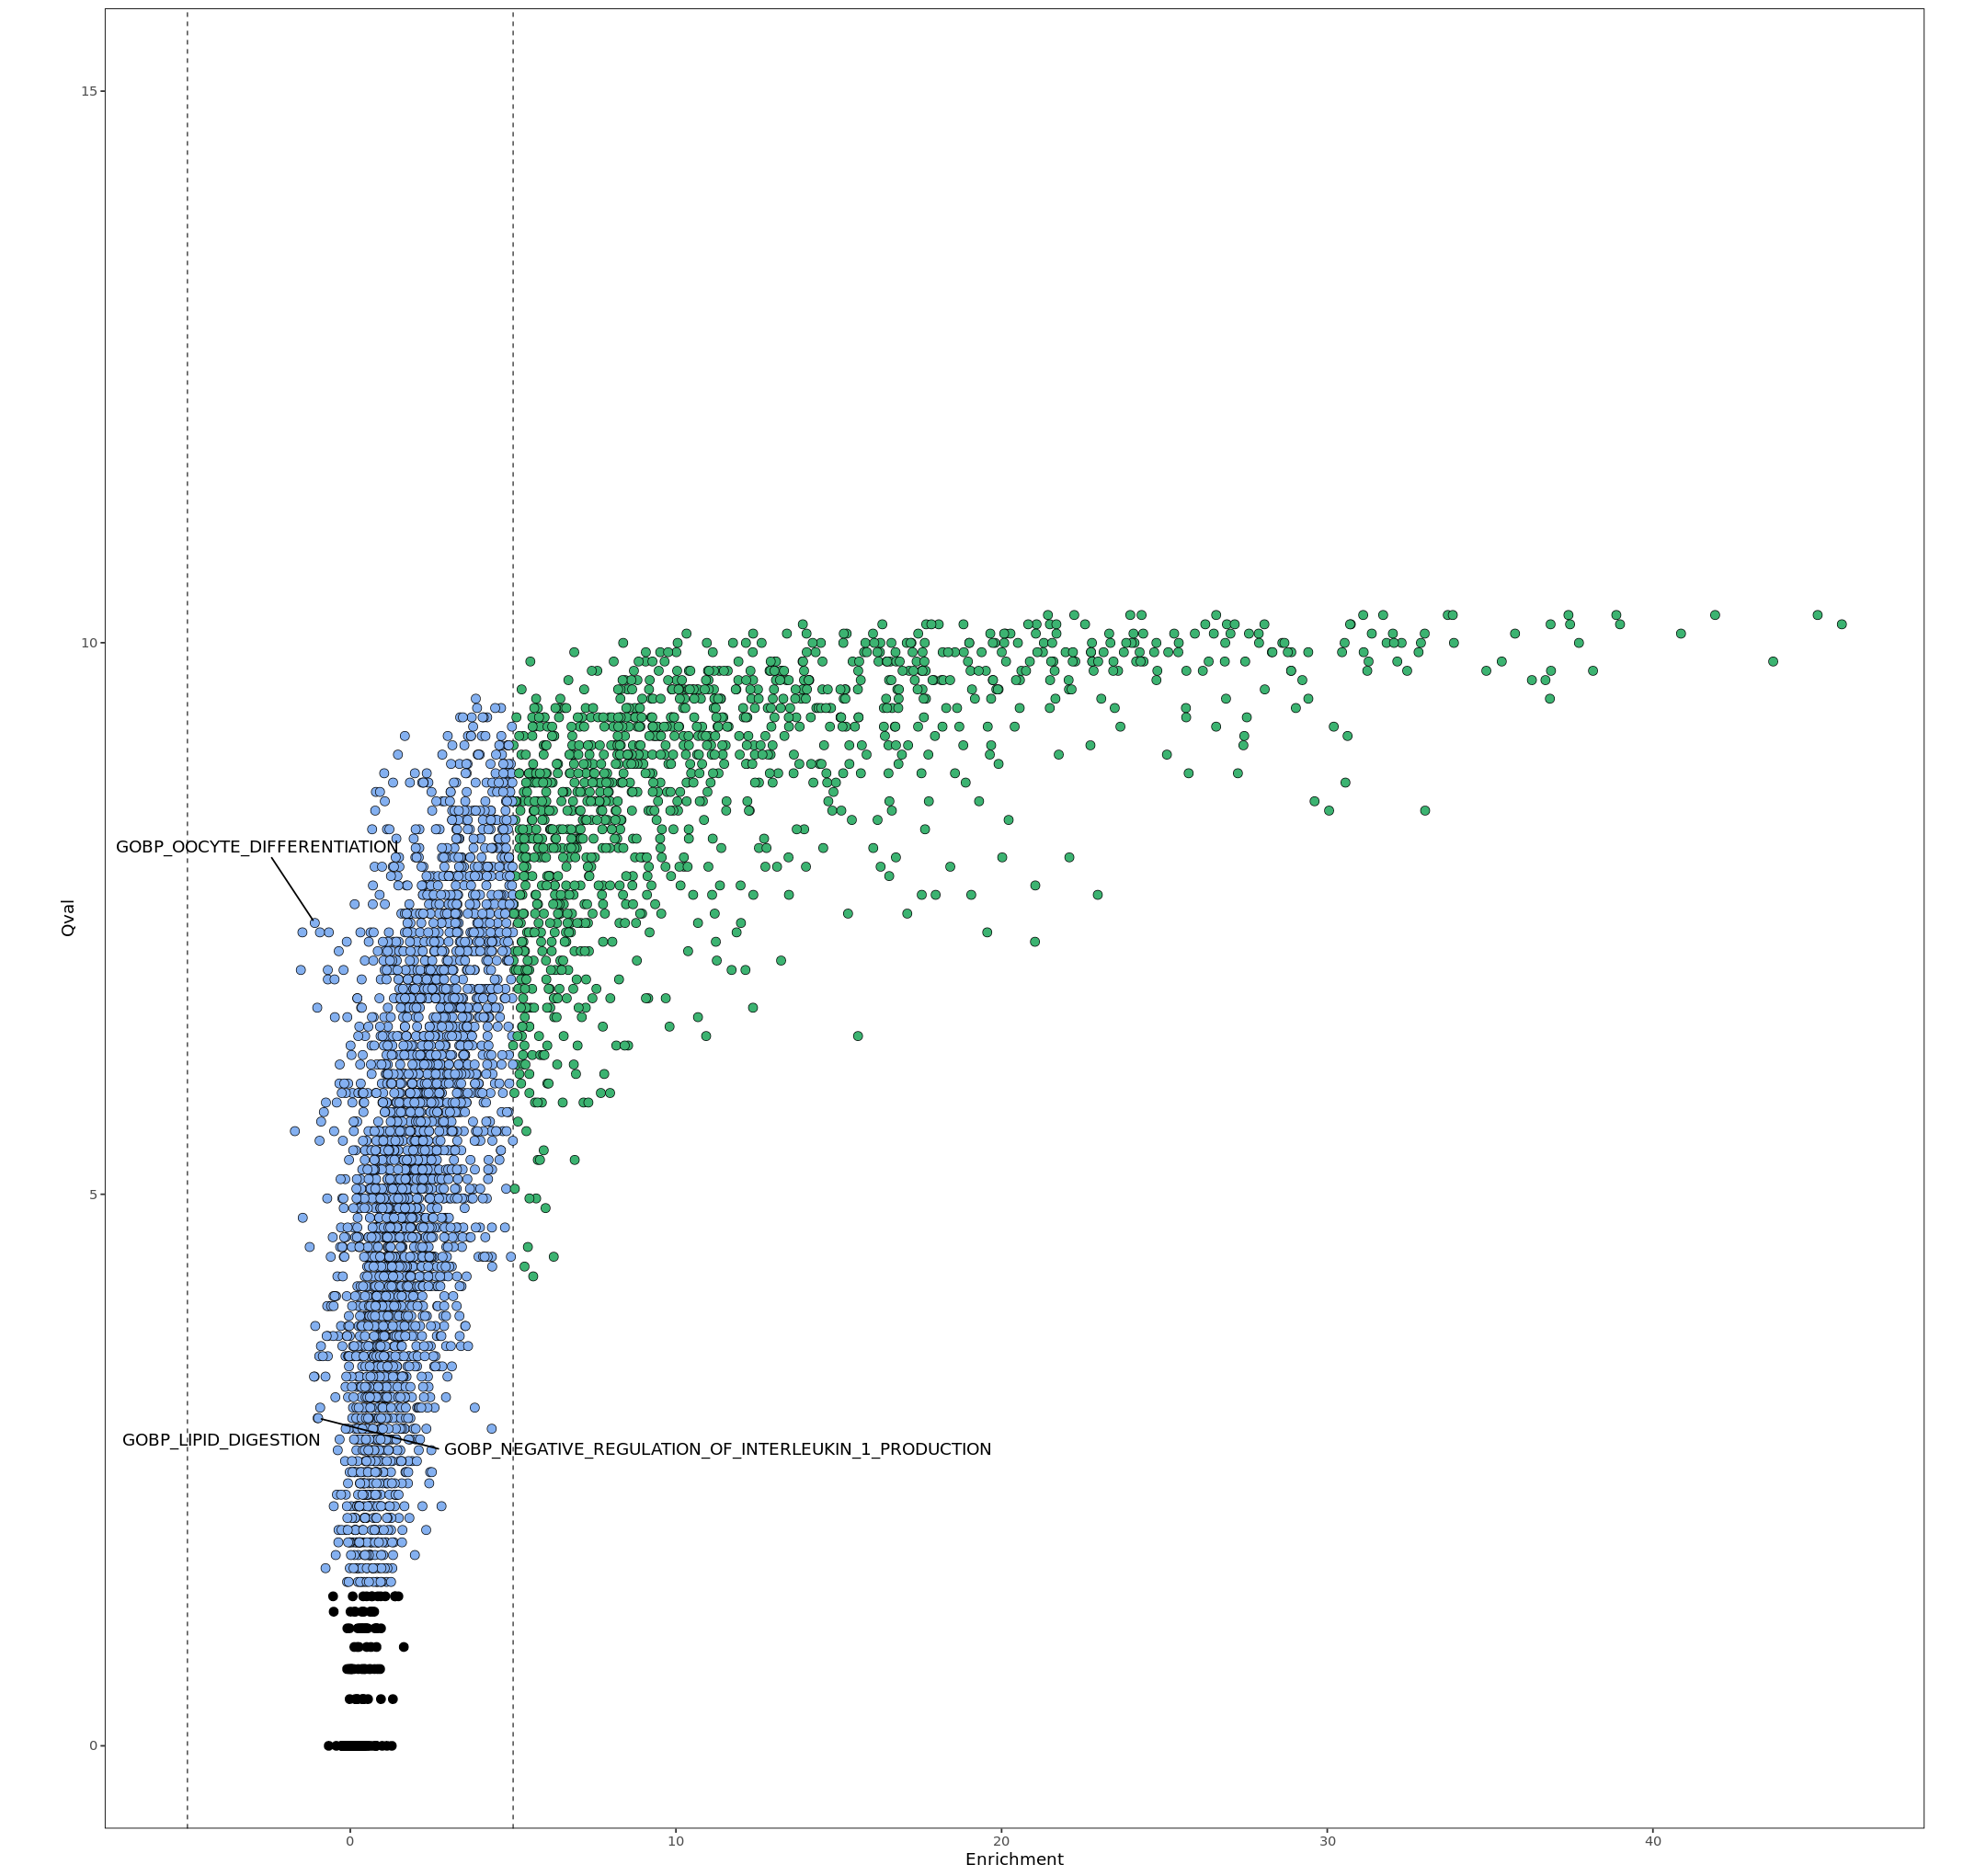

In [46]:
ggplot(rest_act, aes(-FC, qval, label = label)) +
  geom_vline(xintercept = c(-5, 5), linetype = "dashed", col = 'black', lwd = 0.3) +
  geom_point(cex = 2.6, shape = 21, fill = rest_act$color, stroke = 0.3) +
  #geom_point(data = rest_act, shape = 21, cex = 2.8, fill = "orangered2", color = "black", stroke = 0.3) +
  geom_text_repel(max.overlaps = 100, force = 10) +
  #xlim(-400, 400) +
  ylim(0, 15) +
  xlab("Enrichment") +
  ylab("Qval") +
  theme(panel.background = element_blank(),
        panel.border = element_rect(fill = NA),
        aspect.ratio = 1)

In [ ]:
neuro

In [68]:
pathway <- c("2610042L04RIK", "ABHD17A", "ABHD17B", "ABHD17C", "ABI2", "ABI3BP", "ABL1", "ABL2", "ACHE", "ACTB", "ACTR2", "ACTR3", "ADAM10", "ADD2", "ADGRB1", "ADGRB2", "ADGRB3", "ADGRE5", "ADGRF1", "ADGRL1", "ADGRL2", "ADGRL3", "ADNP", "AFDN", "AFG3L2", "AGRN", "AKAP5", "AKT1", "ALS2", "AMIGO1", "AMIGO2", "AMIGO3", "ANAPC2", "ANK3", "APBB1", "APOE", "APP", "APPL1", "ARC", "ARF1", "ARF4", "ARF6", "ARHGAP22", "ARHGAP33", "ARHGAP39", "ARHGAP44", "ARHGEF15", "ARHGEF7", "ARHGEF9", "ASAP1", "ASIC2", "ATP2B2", "BAIAP2", "BCAN", "BDNF", "BHLHB9", "BSN", "C1QA", "C1QB", "C1QC", "C1QL1", "C1QL2", "C1QL3", "C3", "C5AR1", "CABP1", "CACNA1A", "CACNA1S", "CACNA2D2", "CACNB1", "CACNB2", "CACNB3", "CACNB4", "CACNG2", "CADM1", "CALCA", "CAMK1", "CAMK2B", "CAMKV", "CAP2", "CAPRIN1", "CAPRIN2", "CASK", "CBLN1", "CBLN2", "CBLN3", "CBLN4", "CD2AP", "CDC20", "CDC42", "CDH1", "CDH10", "CDH2", "CDH6", "CDH8", "CDH9", "CDK5", "CDK5R1", "CDKL5", "CFL1", "CHAT", "CHCHD10", "CHD4", "CHMP2B", "CHRD", "CHRDL1", "CHRNA1", "CHRNA7", "CHRNB1", "CHRNB2", "CKAP5", "CLN3", "CLSTN1", "CLSTN2", "CLSTN3", "CNKSR2", "CNTN2", "CNTN5", "CNTNAP1", "CNTNAP2", "CNTNAP4", "COL4A1", "COL4A5", "COLQ", "CPNE6", "CRIPT", "CRK", "CRKL", "CTNNA2", "CTNNB1", "CTNND2", "CTTN", "CTTNBP2", "CUX2", "CX3CR1", "CYFIP1", "DAB2IP", "DACT1", "DAG1", "DBN1", "DBNL", "DCTN1", "DGKB", "DGKZ", "DHX36", "DIP2A", "DISC1", "DKK1", "DLG4", "DLG5", "DLGAP3", "DMPK", "DNAJA3", "DNM1L", "DNM3", "DOCK10", "DOCK7", "DOK7", "DRD1", "DRD2", "DRP2", "DTNBP1", "DVL1", "EEF2K", "EFNA1", "EFNA5", "EFNB1", "EFNB2", "EFNB3", "EGLN1", "EIF4G1", "ELAVL2", "ELFN1", "EPHA3", "EPHA4", "EPHA5", "EPHA7", "EPHB1", "EPHB2", "EPHB3", "ERBB2", "ERBB4", "ERC1", "ERC2", "ETV5", "EZR", "F2R", "FARP1", "FBXO45", "FCGR2B", "FGF13", "FGFR2", "FILIP1", "FLNA", "FLRT1", "FLRT2", "FLRT3", "FMR1", "FRMPD4", "FRRS1L", "FYN", "FZD1", "FZD5", "FZD9", "GABRA1", "GABRA2", "GABRB2", "GABRB3", "GABRG2", "GAP43", "GDNF", "GET1", "GHRL", "GHSR", "GJA10", "GLRA3", "GLRB", "GNPAT", "GPC4", "GPHN", "GPM6A", "GPR158", "GRIA1", "GRID1", "GRID2", "GRIN1", "GRIN2A", "GRIN2B", "GRIP2", "GRIPAP1", "GRM5", "GRN", "GSK3B", "HAPLN4", "HDAC6", "HIP1R", "HMCN2", "HNRNPK", "HNRNPM", "HOMER1", "HSPA8", "HTR1A", "ICAM5", "IGF1R", "IGSF21", "IGSF9", "IGSF9B", "IL10", "IL10RA", "IL1RAP", "IL1RAPL1", "IL1RAPL2", "INS1", "INS2", "INSR", "IQSEC3", "ITGA3", "ITGAM", "ITGB1", "ITGB3", "ITPKA", "ITSN1", "KALRN", "KCNJ8", "KIF1A", "KIRREL3", "KLK8", "KY", "L1CAM", "LAMA5", "LAMB2", "LARGE1", "LGI2", "LGMN", "LHFPL4", "LINGO2", "LINGO4", "LMX1A", "LMX1B", "LRFN1", "LRFN2", "LRFN3", "LRFN4", "LRFN5", "LRP4", "LRP5", "LRP8", "LRRC24", "LRRC4", "LRRC4B", "LRRC4C", "LRRK2", "LRRN1", "LRRN3", "LRRTM1", "LRRTM2", "LRRTM3", "LRRTM4", "LRTM1", "LRTM2", "LZTS1", "LZTS3", "MAGI2", "MALAT1", "MAPK14", "MAPT", "MARCKS", "MARK2", "MDGA1", "MDGA2", "MECP2", "MEF2C", "MESD", "MFN1", "MFN2", "MTMR2", "MUSK", "MYCBP2", "MYH10", "MYO5A", "MYO5B", "MYO6", "MYO9A", "NBEA", "NCAN", "NECTIN1", "NEDD4", "NEDD9", "NEFL", "NEGR1", "NEURL1A", "NEUROD2", "NF1", "NFASC", "NFATC4", "NFIA", "NGEF", "NLGN1", "NLGN2", "NLGN3", "NLGN4L", "NOS1AP", "NPAS4", "NPTN", "NPTX1", "NPTXR", "NRCAM", "NRG1", "NRG2", "NRG3", "NRP1", "NRP2", "NRXN1", "NRXN2", "NRXN3", "NTN1", "NTNG1", "NTNG2", "NTRK1", "NTRK2", "NTRK3", "NUMB", "NUMBL", "OGT", "OPA1", "OPHN1", "OXT", "OXTR", "P2RX2", "PAFAH1B1", "PAK1", "PAK3", "PALLD", "PALM", "PCDH17", "PCDH8", "PCDHB16", "PCDHGC3", "PCDHGC4", "PCDHGC5", "PCLO", "PDGFB", "PDLIM5", "PDZRN3", "PFN1", "PFN2", "PGRMC1", "PICALM", "PICK1", "PIK3R1", "PIN1", "PLXNA4", "PLXNB1", "PLXNB2", "PLXNC1", "PLXND1", "PMP22", "PPFIA1", "PPFIA2", "PPFIA3", "PPFIA4", "PPFIBP1", "PPFIBP2", "PPP1R9A", "PRKCA", "PRMT3", "PRNP", "PRRT1", "PSD", "PSEN1", "PSEN2", "PTEN", "PTK2", "PTK2B", "PTN", "PTPN13", "PTPRD", "PTPRF", "PTPRO", "PTPRS", "PTPRT", "RAB17", "RAB29", "RAB39B", "RAB3A", "RAC1", "RAC3", "RAP1B", "RAP2A", "RAPGEF4", "RAPSN", "RBMX", "RELN", "RER1", "REST", "RHEB", "RHOA", "RHOB", "RIMS2", "RIMS3", "RIMS4", "ROBO1", "ROCK1", "ROCK2", "ROR2", "RPH3A", "RPS6KA5", "SDCBP", "SDF4", "SDK2", "SEMA3A", "SEMA3E", "SEMA3F", "SEMA4A", "SEMA4D", "SEPTIN11", "SEPTIN7", "SETD5", "SEZ6", "SEZ6L", "SEZ6L2", "SH3GL2", "SHANK1", "SHANK2", "SHANK3", "SHISA6", "SHISA7", "SIPA1L1", "SIX1", "SIX4", "SLC18A3", "SLC1A1", "SLC25A46", "SLC6A1", "SLC7A11", "SLC8A2", "SLC8A3", "SLC9A6", "SLIT2", "SLITRK1", "SLITRK2", "SLITRK3", "SLITRK4", "SLITRK5", "SLITRK6", "SNAP91", "SNAPIN", "SNCA", "SNCB", "SNCG", "SNTA1", "SNX27", "SORBS1", "SORBS2", "SORT1", "SPARC", "SPARCL1", "SPG11", "SPTB", "SPTBN2", "SPTBN4", "SRCIN1", "SRGAP2", "SRGN", "SRPX2", "SSH1", "ST8SIA2", "STAU1", "STAU2", "STK38", "STK38L", "SYBU", "SYMBOL", "SYN1", "SYNDIG1", "SYNGAP1", "SYNPO", "TANC1", "TANC2", "TAOK2", "THBS2", "TIAM1", "TLR2", "TMEM108", "TNC", "TNF", "TNR", "TPBG", "TREM2", "TSC1", "TSC2", "TUBA1A", "TUBB5", "UBE2V2", "UBE3A", "UNC13A", "UNC13B", "UNC13C", "VCP", "VHL", "VPS35", "VSTM5", "WASF1", "WASF2", "WASF3", "WASL", "WNT3A", "WNT5A", "WNT7A", "WNT7B", "XLR3B", "XLR4A", "XLR4B", "YWHAZ", "ZDHHC12", "ZDHHC15", "ZDHHC2", "ZFP365", "ZFP804A", "ZMYND8")

In [ ]:
nfkb

In [70]:
pathway <- c("KLF6", "JAG1", "DENND5A", "GCH1", "B4GALT1", "ICAM1", "IL1B", "IL6", "IRF1", "LAMB3", "MYC", "NR4A2", "OLR1", "PLAU", "CCND1", "IFIH1", "BMP2", "TAP1", "TGIF1", "TLR2", "TNF", "IRS2", "LITAF", "MAP3K8", "ABCA1", "EGR2", "CLCF1", "TNC", "IL7R", "LDLR", "SMAD3", "NFKB2", "TUBB2A", "NR4A3", "SQSTM1", "PHLDA1", "NFAT5", "B4GALT5", "TNIP1", "TANK", "CDKN1A", "CEBPB", "CEBPD", "PDLIM5", "EHD1", "BTG3", "CSF1", "CSF2", "GADD45A", "RCAN1", "HBEGF", "DUSP1", "DUSP2", "EDN1", "EFNA1", "EGR1", "EGR3", "ETS2", "F2RL1", "F3", "FOS", "FOSL2", "MAFF", "FUT4", "GEM", "CXCL1", "NR4A1", "HES1", "BIRC2", "BIRC3", "ID2", "IFIT2", "IFNGR2", "CCN1", "IL1A", "IL6ST", "IL12B", "IL15RA", "TNFRSF9", "IL18", "INHBA", "CXCL10", "JUN", "JUNB", "AREG", "RHOB", "LIF", "MARCKS", "MXD1", "MCL1", "ATF3", "NFE2L2", "NFIL3", "NFKB1", "NFKBIA", "NFKBIE", "NINJ1", "ATP2B1", "SERPINE1", "SERPINB2", "PDE4B", "PER1", "PLAUR", "PLEK", "MAP2K3", "PTGS2", "PTPRE", "PTX3", "REL", "BCL2A1D", "RELA", "RELB", "BCL3", "BCL6", "SAT1", "CCL5", "CCL20", "CXCL5", "CXCL11", "SDC4", "SGK1", "SLC2A3", "SOD2", "STAT5A", "BTG1", "KLF10", "TNFAIP2", "TNFAIP6", "TRAF1", "PHLDA2", "VEGFA", "ZFP36", "BTG2", "FOSL1", "SNN", "BHLHE40", "TNFSF9", "CFLAR", "TSC22D1", "SPHK1", "MSC", "CD83", "CD80", "CD44", "CD69", "GFPT2", "IL23A", "PANX1", "G0S2", "PPP1R15A", "CCRL2", "ICOSL", "ACKR3", "CCNL1", "TNFAIP3", "PLK2", "FJX1", "KLF4", "PTGER4", "KLF9", "KYNU", "PLPP3", "SPSB1", "RIPK2", "TNIP2", "TRIP10", "CXCL2", "SLC16A6", "TNFAIP8", "GPR183", "PNRC1", "PFKFB3", "DUSP4", "IER5", "YRDC", "SERPINB8", "ZC3H12A", "SLC2A6", "FOSB", "PMEPA1", "GADD45B", "IER2", "RIGI", "KLF2", "TRIB1", "SOCS3", "DNAJB4", "ZBTB10", "KDM6B", "TIPARP", "NAMPT", "DRAM1", "IER3", "RNF19B", "DUSP5", "EIF1")

In [ ]:
wnt pos

In [33]:
pathway <- c("ABL1", "ADGRA2", "ADNP", "AMER1", "ANKRD6", "ASPM", "ATP6AP2", "ATP6V0C", "ATP6V1C2", "BAMBI", "BIRC8", "BMAL1", "BMP2", "CAPRIN2", "CAV1", "CCAR2", "CCN4", "CDC73", "CDH3", "COL1A1", "CRBN", "CSNK1D", "CSNK1E", "CSNK1G1", "CSNK1G2", "CSNK1G3", "CSNK2A1", "CTDNEP1", "DAAM2", "DAB2", "DACT1", "DAPK3", "DDX3X", "DEPDC1B", "DISC1", "DIXDC1", "DKK1", "DKK2", "DLX5", "EDA", "EGF", "EGFR", "FAM53B", "FGF10", "FGF2", "FGF9", "FGFR2", "FRAT1", "FZD9", "GID8", "GPC3", "GPC5", "GPRC5B", "GSKIP", "HHEX", "ILK", "JRK", "JUP", "KANK1", "LBX2", "LEF1", "LGR4", "LGR5", "LGR6", "LRRK1", "LRRK2", "LYPD6", "MACF1", "MBD2", "MIR145", "MIR26A1", "MIR29B1", "MIR346", "MIR501", "MLLT3", "NFKB1", "NKD1", "NLE1", "NRARP", "PBXIP1", "PIN1", "PLEKHA4", "PPM1A", "PPM1B", "PPM1N", "PRDM15", "PTK7", "RBPJ", "RECK", "RNF146", "RNF220", "RPS12", "RSPO1", "RSPO2", "RSPO3", "RSPO4", "RUVBL1", "SALL1", "SCEL", "SEMA5A", "SFRP1", "SFRP2", "SFRP4", "SHH", "SKI", "SMAD3", "SMARCA4", "SMURF2", "SOX4", "SPIN1", "SRC", "SULF1", "SULF2", "TBL1X", "TBL1XR1", "TERT", "TGFB1", "TLR2", "TMEM132A", "TMEM198", "TMEM9", "TNFAIP3", "TNKS", "TNKS2", "TRPM4", "TTC21B", "UBE2B", "UBR5", "USP34", "USP47", "USP8", "VCP", "VPS35", "WLS", "WNK1", "WNK2", "WNT10B", "WNT3", "WNT3A", "WNT5A", "WNT5B", "XIAP", "YAP1", "ZBED3", "ZEB2", "ZRANB1")

In [ ]:
wnt signaling

In [36]:
pathway <- c("ABL1", "ADGRA2", "ADNP", "ALPK2", "AMER1", "AMER2", "AMER3", "AMFR", "AMOTL1", "AMOTL2", "ANKRD6", "APC", "APC2", "APCDD1", "APCDD1L", "APOE", "APP", "ARHGEF19", "ARL6", "ASPM", "ATP6AP2", "ATP6V0C", "ATP6V1C2", "AXIN1", "AXIN2", "BAMBI", "BARX1", "BCL7B", "BCL9", "BCL9L", "BICC1", "BIRC8", "BMAL1", "BMP2", "BRD7", "BTRC", "C12orf43", "CALCOCO1", "CAPRIN2", "CAV1", "CBY1", "CCAR2", "CCDC88C", "CCN4", "CCND1", "CCNE1", "CCNY", "CCNYL1", "CCNYL2", "CCNYL3", "CD24", "CDC42", "CDC73", "CDH2", "CDH3", "CDK14", "CELA1", "CELSR1", "CELSR2", "CELSR3", "CER1", "CHD8", "CITED1", "CMAHP", "COL1A1", "CPE", "CPZ", "CRBN", "CSNK1A1", "CSNK1A1L", "CSNK1D", "CSNK1E", "CSNK1G1", "CSNK1G2", "CSNK1G3", "CSNK2A1", "CSNK2A2", "CSNK2B", "CTDNEP1", "CTHRC1", "CTNNB1", "CTNNBIP1", "CTNND1", "CTNND2", "CTR9", "CUL3", "CXXC4", "CYLD", "DAAM1", "DAAM2", "DAB2", "DAB2IP", "DACT1", "DACT3", "DAPK3", "DCDC2", "DDB1", "DDIT3", "DDX3X", "DEPDC1B", "DISC1", "DIXDC1", "DKK1", "DKK2", "DKK3", "DKK4", "DKKL1", "DLX3", "DLX5", "DRAXIN", "DRD2", "DVL1", "DVL2", "DVL3", "EDA", "EDN1", "EDNRA", "EDNRB", "EGF", "EGFR", "EGR1", "EMD", "ETV2", "EXT1", "FAM53B", "FBXW11", "FBXW4", "FERMT1", "FERMT2", "FGF10", "FGF2", "FGF9", "FGFR2", "FOLR1", "FOXD1", "FOXL1", "FOXO1", "FRAT1", "FRAT2", "FRMD8", "FRMD8P1", "FRZB", "FUZ", "FZD1", "FZD10", "FZD2", "FZD3", "FZD4", "FZD5", "FZD6", "FZD7", "FZD8", "FZD9", "G3BP1", "GATA3", "GID8", "GLI1", "GLI3", "GNAQ", "GPC3", "GPC4", "GPC5", "GPC6", "GPRC5B", "GRB10", "GREM1", "GRHL3", "GRK5", "GRK6", "GSC", "GSK3A", "GSK3B", "GSKIP", "HBP1", "HDAC1", "HECW1", "HESX1", "HHEX", "HIC1", "HMGXB4", "HNF1B", "IFT20", "IFT80", "IGFBP1", "IGFBP2", "IGFBP4", "IGFBP6", "ILK", "INVS", "ISL1", "ITGA3", "JADE1", "JRK", "JUP", "KANK1", "KLF15", "KLF4", "KLHL12", "KPNA1", "KREMEN1", "KREMEN2", "LATS1", "LATS2", "LBX2", "LDB1", "LEF1", "LEO1", "LGR4", "LGR5", "LGR6", "LIMD1", "LMBR1L", "LRP1", "LRP4", "LRP5", "LRP6", "LRRFIP2", "LRRK1", "LRRK2", "LYPD6", "LZIC", "LZTS2", "MACF1", "MAD2L2", "MAGI2", "MAPK14", "MARK1", "MARK2", "MBD2", "MCC", "MDFI", "MDFIC", "MDK", "MED12", "MESD", "MESP1", "MIR1-1", "MIR145", "MIR199A1", "MIR19B1", "MIR224", "MIR26A1", "MIR29B1", "MIR29C", "MIR32", "MIR346", "MIR498", "MIR501", "MIR665", "MITF", "MKS1", "MLLT3", "MYOC", "NDP", "NDRG2", "NFATC1", "NFATC4", "NFKB1", "NID1", "NKD1", "NKD2", "NKX2-5", "NLE1", "NLK", "NOG", "NOTCH1", "NOTUM", "NPHP3", "NPHP4", "NR4A2", "NRARP", "NXN", "OPRM1", "OTUD5", "OTULIN", "PAF1", "PBXIP1", "PFDN5", "PIAS4", "PIN1", "PKD1", "PKD2", "PLCG2", "PLEKHA4", "PLPP3", "PORCN", "PPM1A", "PPM1B", "PPM1N", "PPP1CA", "PPP2CA", "PPP2R1A", "PRDM15", "PRICKLE1", "PRICKLE2", "PRKAA1", "PRKAA2", "PRKN", "PSEN1", "PTEN", "PTK7", "PTPN23", "PTPRO", "PTPRU", "PYGO1", "PYGO2", "RAB5A", "RAC1", "RAC3", "RACK1", "RARG", "RBMS3", "RBPJ", "RBX1", "RECK", "RHOA", "RNF138", "RNF146", "RNF213", "RNF220", "RNF43", "ROR1", "ROR2", "RPS12", "RSPO1", "RSPO2", "RSPO3", "RSPO4", "RTF1", "RUVBL1", "RUVBL2", "RYK", "SALL1", "SCEL", "SCYL2", "SDC1", "SDHAF2", "SEMA5A", "SENP2", "SFRP1", "SFRP2", "SFRP4", "SFRP5", "SHH", "SHISA2", "SHISA3", "SHISA6", "SIAH1", "SIAH2", "SKI", "SKIC8", "SLC9A3R1", "SMAD3", "SMARCA4", "SMURF1", "SMURF2", "SNAI2", "SNX3", "SOST", "SOSTDC1", "SOX10", "SOX13", "SOX17", "SOX2", "SOX30", "SOX4", "SOX7", "SOX9", "SPEF1", "SPIN1", "SRC", "STK11", "STK3", "STK4", "STRN", "SULF1", "SULF2", "TAX1BP3", "TBL1X", "TBL1XR1", "TBX18", "TCF7", "TCF7L1", "TCF7L2", "TERT", "TGFB1", "TGFB1I1", "TIAM1", "TLE1", "TLE2", "TLE3", "TLE4", "TLE5", "TLE6", "TLE7", "TLR2", "TMEM131L", "TMEM132A", "TMEM170B", "TMEM198", "TMEM237", "TMEM64", "TMEM67", "TMEM88", "TMEM88B", "TMEM9", "TNFAIP3", "TNIK", "TNKS", "TNKS2", "TNN", "TPBG", "TPBGL", "TRABD2A", "TRABD2B", "TRPM4", "TSC2", "TSKU", "TTC21B", "UBAC2", "UBE2B", "UBR5", "USP34", "USP47", "USP8", "VANGL1", "VANGL2", "VAX2", "VCP", "VGLL4", "VPS35", "WIF1", "WLS", "WNK1", "WNK2", "WNT1", "WNT10A", "WNT10B", "WNT11", "WNT16", "WNT2", "WNT2B", "WNT3", "WNT3A", "WNT4", "WNT5A", "WNT5B", "WNT6", "WNT7A", "WNT7B", "WNT8A", "WNT8B", "WNT9A", "WNT9B", "WWOX", "WWTR1", "XIAP", "YAP1", "ZBED3", "ZBTB33", "ZEB2", "ZNF703", "ZNRF3", "ZRANB1")

In [59]:
head(embryo@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,origin,TIME,SAMP,CellName,Cluster,Time,RNA_snn_res.0.1,seurat_clusters
,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<fct>
AACTAGCTCAGGGCCT-1_1_1,SeuratProject,403,184,EMB,E7,A,AACTAGCTCAGGGCCT-1_1,C7,J7,3,3
AACTCACAGACTATTG-1_1_1,SeuratProject,690,284,EMB,E7,A,AACTCACAGACTATTG-1_1,C7,J7,5,5
AAGAATCAGCTCGCTT-1_1_1,SeuratProject,774,372,EMB,E7,A,AAGAATCAGCTCGCTT-1_1,C7,J7,5,5
AAGCTCCCACTATGGC-1_1_1,SeuratProject,33183,5672,EMB,E7,A,AAGCTCCCACTATGGC-1_1,C7,J7,5,5
AAGCTTGGTGCGCATG-1_1_1,SeuratProject,3530,1104,EMB,E7,A,AAGCTTGGTGCGCATG-1_1,C7,J7,5,5
AATACCGGTTAACGGC-1_1_1,SeuratProject,24820,5436,EMB,E7,A,AATACCGGTTAACGGC-1_1,C7,J7,5,5
